# Understanding Descriptive Statistics

Import the necessary libraries here:

In [4]:
import pandas as pd
import numpy as np
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [5]:
def rolling_dice(n):
    rolls = []
    for i in range(n):
        roll = random.randint(1,6)
        rolls.append(roll)

    return rolls
#rolling_dice(10)
df = pd.DataFrame(rolling_dice(10),columns=['Rolls'])
df

,Rolls
0,2
1,4
2,5
3,4
4,2
5,6
6,5
7,3
8,2
9,2


#### 2.- Plot the results sorted by value.

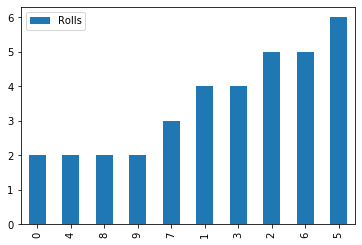

In [6]:
df_sorted = df.sort_values(by='Rolls')
df_sorted.plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F5B809C08>]],
      dtype=object)

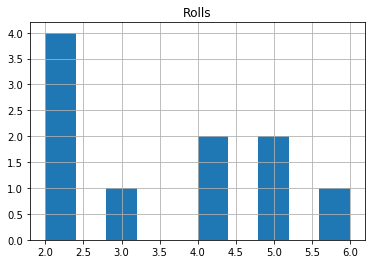

In [7]:
df.sort_values(by='Rolls').hist()

# Answer
#### we can see the main difference is the the plot above plots all the outputs and the respective value, where this plot groups th outputs by value, creating like this the frequency distribution so we can see how many times we got each of the outputs.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def m_mean(x):
    total = sum(x)
    result = (total/x.count())
    return result
print('Mean is: ' , m_mean(df_sorted.Rolls))
df.Rolls.mean()

Mean is:  3.5


3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
Freq_distr = df_sorted['Rolls'].value_counts()
Freq_distr_df = pd.DataFrame(Freq_distr)
Freq_distr_df.columns=['Frequency']
Freq_distr_df


,Frequency
2,4
5,2
4,2
6,1
3,1


In [10]:
m_mean(Freq_distr)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
def m_median(a):
    if len(a) % 2 == 0: 
        median1 = a[len(a)//2] 
        median2 = a[len(a)//2 - 1] 
        median = (median1 + median2)//2
    else: 
        median = a[len(a)//2] 
    print("Median is: " , median) 
m_median(df_sorted.Rolls)

Median is:  4


In [12]:
df_sorted.describe()

,Rolls
count,10.000000
mean,3.500000
std,1.509231
min,2.000000
25%,2.000000
50%,3.500000
75%,4.750000
max,6.000000


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
def q1(lst):
    return sorted(lst)[int(len(lst) * .25)]
def q2(lst):
    return sorted(lst)[int(len(lst)/2)]
def q3(lst):
    return sorted(lst)[int(len(lst) * .75)]

print(q1(df_sorted['Rolls']))
print(q2(df_sorted['Rolls']))
print(q3(df_sorted['Rolls']))

2
4
5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [40]:
dice_hundred = pd.read_csv("../data/roll_the_dice_hundred.csv")
dice_hundred = dice_hundred.sort_values(by='value')

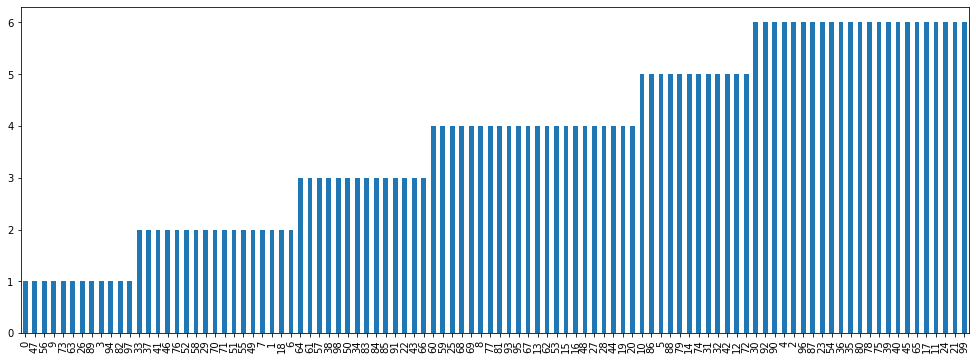

In [41]:
#dice_hundred.plot(kind='bar')
dice_hundred.value.plot(kind='bar', figsize=(17,6))


If we plot all the columns, two of them dont make much sense because they are the index of the roll. but on the third one from the column value we can see the frequency in which the values have appeared in this 100 random dice rolls.
We can see it's more homogeneous because the more rolls you have the more this graph is going to look like the actually probability ditribution we expect. (in the case of rolling a dice, 1/6 of the frequency for every value). But with 100 rolls it's still not certain to get that distribution.


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [42]:
dice_hundred.value.mean()

3.74

#### 3.- Now, calculate the frequency distribution.


In [43]:
Freq_distr100 = dice_hundred.value.value_counts()
Freq_distr_100_df = pd.DataFrame(Freq_distr100)
Freq_distr_100_df.columns=['Frequency']
Freq_distr_100_df


,Frequency
6,23
4,22
2,17
3,14
5,12
1,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

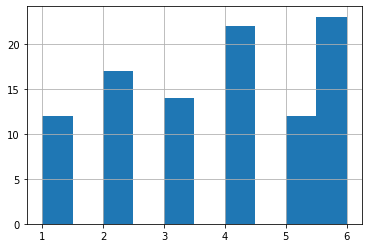

In [44]:
dice_hundred.value.hist()

From this histogram we can see a bit more clearly that the outcomes are converging, but with only 100 rolls thi convergence it's still not final (maybe with 1000 rolls? we'll see).

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

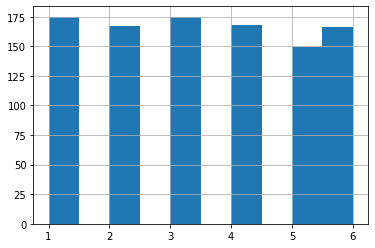

In [46]:
dice_thousand = pd.read_csv("../data/roll_the_dice_thousand.csv")
dice_thousand = dice_thousand.sort_values(by='value')
dice_thousand.value.hist()

As we suspected, now all the posible outcome of rolling a dice have a very similar occurence frequency, with 1000 rolls we are already seeing that the probability ditribution is being fullfilled acuratelly. (if we kept increasing the number of rolls, we would end up with a nearly perfect match with it).

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F5EDE6EC8>]],
      dtype=object)

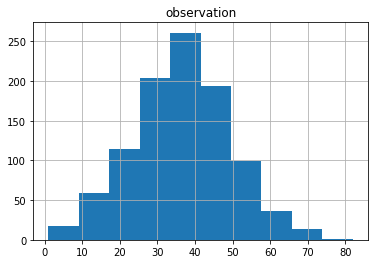

In [48]:
ages = pd.read_csv("../data/ages_population.csv")
ages = ages.sort_values(by='observation')
ages.hist()

My guess is that the mean will be around 40 years and as we are seeing that its normally distributed I'd say the Standard Deviation will be between 10 and 20 years.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [52]:
print('the exact mean is: ' , ages.mean().values , ' and the STD is: ', ages.std().values)

the exact mean is:  [36.56]  and the STD is:  [12.81649963]


Yes, more or les fell into my guess I probably guesed a bit high on the std, but was still between the range I thought

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F6014DE88>]],
      dtype=object)

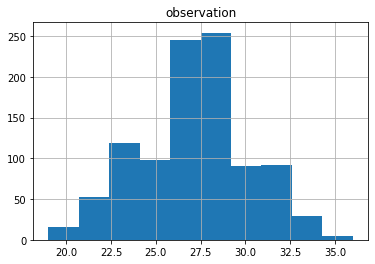

In [57]:
ages2 = pd.read_csv("../data/ages_population2.csv")
ages2 = ages2.sort_values(by='observation')
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

Yes, this is a much younger neighborhood, because ages ocilate from around 20 to around 35 and it looks like most of the people are between 25 and 30. I guess the mean will be around 27 and the standar deviation will be much lower than in step 1, probably around 5.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [58]:
print('the exact mean is: ' , ages2.mean().values , ' and the STD is: ', ages2.std().values)

the exact mean is:  [27.155]  and the STD is:  [2.96981393]


As we expectes the mean is so close to 27 and the std is even lower than I expected, so we fid ourselve with a dataset where at least 68% of people are between 24 and 30, so it's a much more narrowed neighborhood than the one in step 2.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F601EFEC8>]],
      dtype=object)

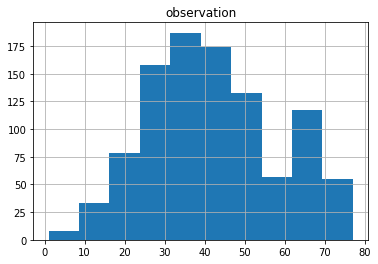

In [60]:
ages3 = pd.read_csv("../data/ages_population3.csv")
ages3 = ages3.sort_values(by='observation')
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [62]:
print('the exact mean is: ' , ages3.mean().values , ' and the STD is: ', ages3.std().values)

the exact mean is:  [41.989]  and the STD is:  [16.14470596]


This frequency distridution is quite skewed to the right, which in this case means that we have an older dataset in general.
we can see the mean and the std are the highest of all three sets. This mean that population3 is the oldest in general, but also the more disperse. (we can also see we have the 60-70 ages range that skews the plot to the right). (Probably eixamples dataset xD).

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [65]:
print(q1(ages3.observation))
print(q2(ages3.observation))
print(q3(ages3.observation))

30.0
40.0
53.0


with the quantiles we can see that 50% of the people is between 30 and 53 years old and the other 50% is younger than 30 or older than 53 so we have people spread in all ages. But we can see the median is pretty similar than the mean, so not as skewed as we thought at the beginning by looking at the plot.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [66]:
def percentil(lst, x):
    return sorted(lst)[int(len(lst) * x)]

In [69]:
print(percentil(ages3.observation, 0.1))
print(percentil(ages3.observation, 0.2))
print(percentil(ages3.observation, 0.3))
print(percentil(ages3.observation, 0.4))
print(percentil(ages3.observation, 0.5))
print(percentil(ages3.observation, 0.6))
print(percentil(ages3.observation, 0.7))
print(percentil(ages3.observation, 0.8))
print(percentil(ages3.observation, 0.9))


22.0
28.0
32.0
36.0
40.0
45.0
50.0
57.0
67.0


We don't see much more from this, just confirms that its a spread dataset (we knew with the deviation) and that it hase a peak outside the mean between 60 and 70 years (probably the babyboomers).

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [34]:
# your code here

In [35]:
"""
your comments here
"""

'\nyour comments here\n'